In [1]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

#データ生成：異なる2つの乱数群を行方向に結合し、100x1の2次元配列にする
X_train = np.r_[np.random.normal(3,1,size=50),np.random.normal(-1,1,size=50)].reshape((100,-1))
#前半50個が1、後半50個が0の配列
y_train = np.r_[np.ones(50),np.zeros(50)]

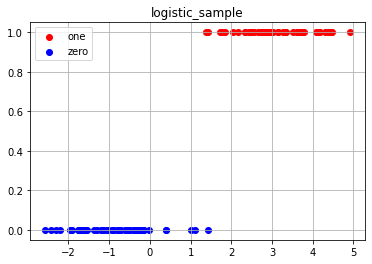

In [6]:
#散布図
X_1 = X_train[:50,]
X_0 = X_train[50:,]
y_1 = y_train[:50,]
y_0 = y_train[50:,]

fig, ax = plt.subplots()
ax.set_title("logistic_sample")
ax.scatter(X_1,y_1,color="red",label="one")
ax.scatter(X_0,y_0,color="blue",label="zero")
ax.grid()
ax.legend()

In [8]:
#モデル作成
model = LogisticRegression()
model.fit(X_train,y_train)

#回帰係数と切片
print(model.coef_)
print(model.intercept_)

[[2.46278904]]
[-2.96561788]


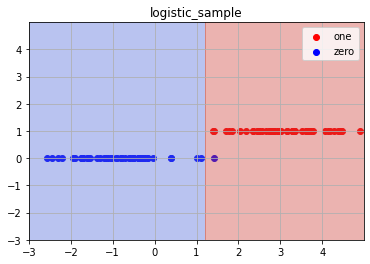

In [15]:
#決定境界を図示したいが、特徴量が1個の時ってどうする？同じ値(X,X)で良いのかな？
fig, ax = plt.subplots()
ax.set_title("logistic_sample")

ax.scatter(X_1,y_1,color="red",label="one")
ax.scatter(X_0,y_0,color="blue",label="zero")
#グラフ用の格子点を生成
grid_line = np.arange(-3,5,0.01)
X, Y = np.meshgrid(grid_line,grid_line)
Z = model.predict(np.array([X.ravel()]).T) #予測確率※revelは多次元配列を1次元にする
Z = Z.reshape(X.shape)
#等高線を図示
ax.contourf(X,Y,Z,alpha=0.4,cmap="coolwarm")
ax.grid()
ax.legend()